In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.10.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt or Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("train_images shape: ", train_images.shape)
print("test_images shape: ", test_images.shape)

train_images shape:  (60000, 28, 28)
test_images shape:  (10000, 28, 28)


## Data Preprocessing

Before training a Neural Network, we must preprocess the data. Lets inspect the first element in the training data.

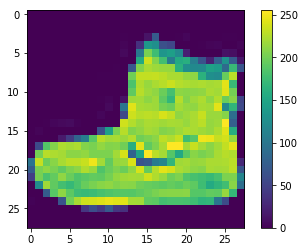

In [4]:
%matplotlib inline

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [5]:
# Data Normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

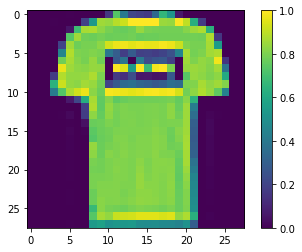

In [6]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.gca().grid(False)

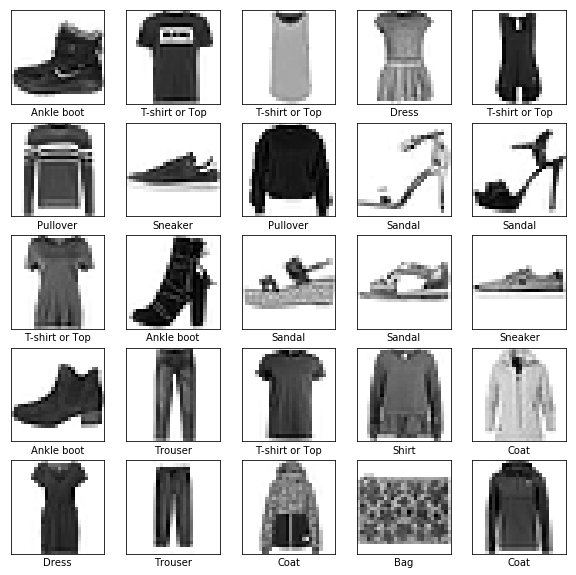

In [7]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [8]:
# Building the model

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
model.compile(
    optimizer = tf.train.AdamOptimizer(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
# train the model on training data
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.4937 - acc: 0.8268
Epoch 2/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3727 - acc: 0.8651
Epoch 3/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3362 - acc: 0.8775
Epoch 4/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.3116 - acc: 0.8844
Epoch 5/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.2935 - acc: 0.8920


## Evaluate Accuracy

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy = ', test_acc)

10000/10000 [==============================] - 0s 33us/step
Test accuracy =  0.8732


## Predictions

In [13]:
predictions = model.predict(test_images)

# lets see the first prediction to see what it looks like

print(predictions[0])

[5.6754590e-07 5.4461129e-09 1.4044874e-08 1.7893760e-09 9.3335339e-09
 7.1865334e-03 8.2110155e-08 7.8544356e-03 2.3755625e-05 9.8493457e-01]


In [14]:
print('Predicted Label: ', np.argmax(predictions[0]))
print('Actual label: ', test_labels[0])

Predicted Label:  9
Actual label:  9


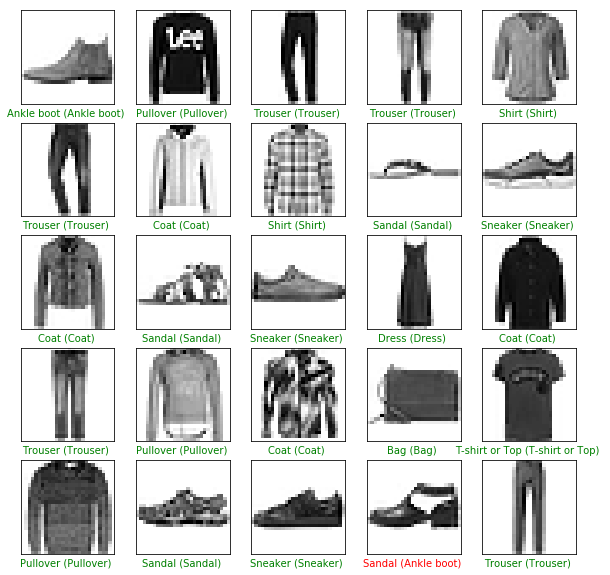

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({}) ".format(class_names[predicted_label], 
                                 class_names[true_label]), color = color)

In [16]:
# grab an image 

img = test_images[0]

# add the image to batch

img = (np.expand_dims(img,0))

# shape

print(img.shape)

(1, 28, 28)


In [17]:
predictions = model.predict(img)
print(predictions)

[[5.6754703e-07 5.4461129e-09 1.4044927e-08 1.7893760e-09 9.3335517e-09
  7.1865334e-03 8.2110155e-08 7.8544440e-03 2.3755625e-05 9.8493457e-01]]


In [18]:
prediction = predictions[0]

print(np.argmax(prediction))

9
